In [3]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

see [in this notebook from the statistics book](</C:/\Users\johan\Documents\GitHub\notebooks\statistics book code\practical-statistics-for-data-scientists\python\notebooks\Chapter 1 - Exploratory Data Analysis.ipynb>).

In [4]:
kc_tax = pd.read_csv(r"C:\Users\johan\Documents\GitHub\notebooks\statistics book code\practical-statistics-for-data-scientists\data\kc_tax.csv.gz")
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\johan\\Documents\\GitHub\\notebooks\\statistics book code\\practical-statistics-for-data-scientists\\data\\kc_tax.csv.gz'

In [ ]:
kc_tax0.ZipCode[:5]

1    98002.0
2    98166.0
3    98108.0
4    98108.0
5    98032.0
Name: ZipCode, dtype: float64

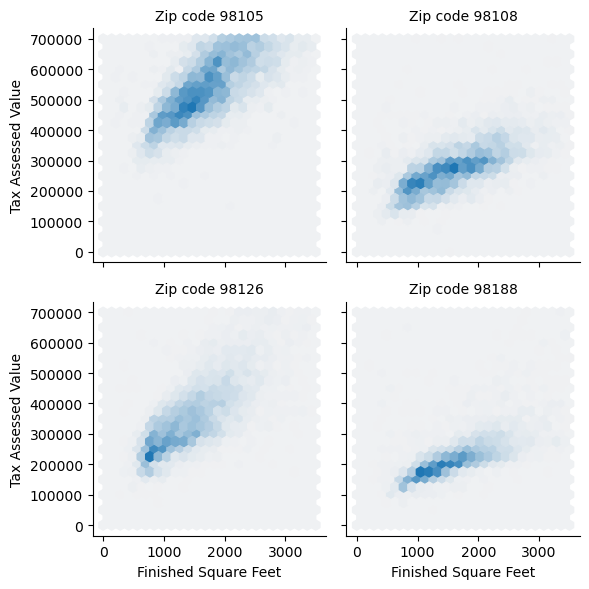

In [ ]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map_dataframe(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])

g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

The more common syntax is: 
(see [here in the docs](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn-facetgrid))

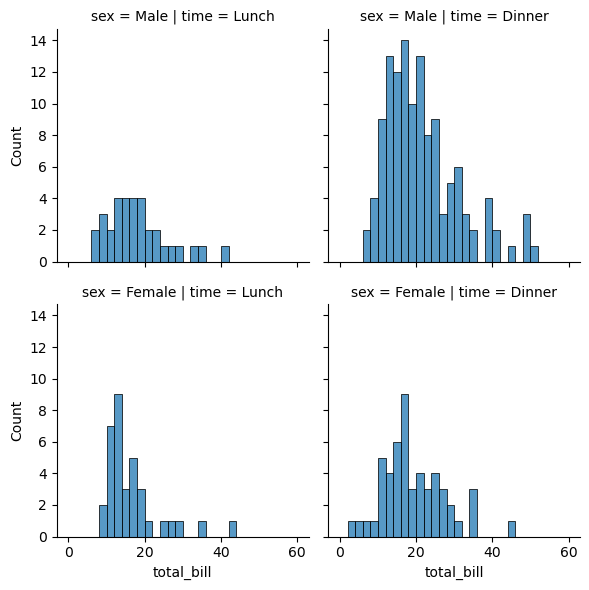

In [ ]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time", row="sex")
g.map_dataframe(sns.histplot, x="total_bill", binwidth=2, binrange=(0, 60))

So the .map() or .map_dataframe() maps an individual axes onto a subplot in the grid. This axis is a passed as a function and parameters in an iterative fashion. `map(function, arg1)` is an iterator that yields items on demand.

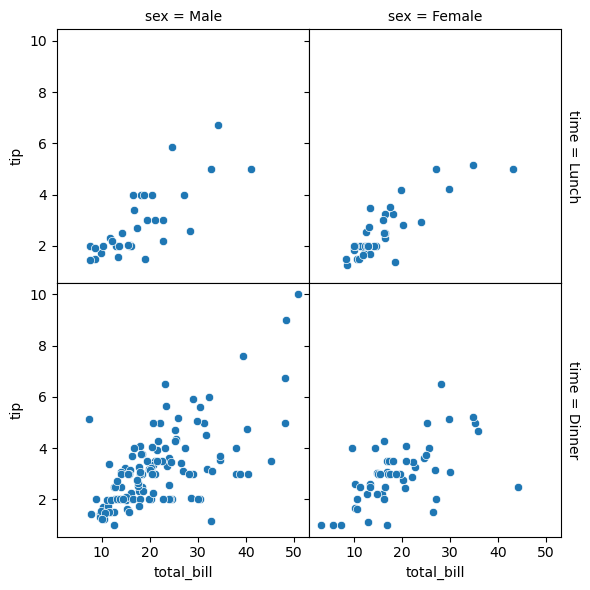

In [ ]:
g = sns.FacetGrid(tips, col="sex", row="time", margin_titles=True, despine=False) # desping: Remove axis spines from the facets.
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.figure.subplots_adjust(wspace=0, hspace=0)